# Example use cases

In [27]:
from encodings_hnns.encodings import HypergraphEncodings
from encodings_hnns.laplacians import Laplacians
import numpy as np
from brec_analysis.utils_for_brec import (

    nx_to_pyg,
)
import networkx as nx
from brec_analysis.southern_orc_example import southern_orc_example
from brec_analysis.plotting_graphs_and_hgraphs_for_brec import plot_graph_pair, plot_hypergraph_pair
from encodings_hnns.liftings_and_expansions import lift_to_hypergraph

## A - Encoding interface

In [28]:
hg: dict[str, dict | int] = {
    "hypergraph": {
        "yellow": [0, 1, 2, 3],
        "red": [1, 2],
        "green": [2, 4, 5],
        "blue": [3, 4],
    },
    "features": np.array([[1], [1], [1], [1], [1], [1]]),
    "labels": {},
    "n": 6,
}
# Instantiates the Hypergraph Curvature Profile class
hgcurvaturprofile = HypergraphEncodings()
hg = hgcurvaturprofile.add_randowm_walks_encodings(hg, verbose=False)
# k is 20 so the features are shape n by 21
assert isinstance(hg["features"], np.ndarray)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 21, f"The shape is {hg['features'].shape[1]}"

print(hg)

{'hypergraph': {'yellow': [0, 1, 2, 3], 'red': [1, 2], 'green': [2, 4, 5], 'blue': [3, 4]}, 'features': array([[1.        , 0.        , 0.14814815, 0.08024691, 0.10048011,
        0.08681984, 0.09403895, 0.08909179, 0.09215521, 0.09012237,
        0.09142979, 0.09057234, 0.09112992, 0.09076514, 0.09100335,
        0.09084744, 0.09094948, 0.09088263, 0.09092645, 0.0908977 ,
        0.09091657],
       [1.        , 0.        , 0.37962963, 0.09259259, 0.24879973,
        0.14366141, 0.20723705, 0.16623099, 0.19185113, 0.17551149,
        0.18584563, 0.17926119, 0.18345126, 0.18077571, 0.18248561,
        0.18139043, 0.18209288, 0.18164153, 0.18193197, 0.18174478,
        0.18186561],
       [1.        , 0.        , 0.47685185, 0.1558642 , 0.34859396,
        0.22638746, 0.3020623 , 0.25446769, 0.28423023, 0.26550903,
        0.27727908, 0.2698567 , 0.27454259, 0.2715778 , 0.27345666,
        0.27226368, 0.27302248, 0.27253896, 0.27284761, 0.27265024,
        0.27277666],
       [1.       

In [29]:
hg = hgcurvaturprofile.add_degree_encodings(hg, verbose=True)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 27, f"The shape is {hg['features'].shape[1]}"

hg = hgcurvaturprofile.add_laplacian_encodings(hg, verbose=True)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 33, f"The shape is {hg['features'].shape[1]}"

The hypergraph features for node 0, are 
 [1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
 0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
 0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
 0.09092645 0.0908977  0.09091657]
We add the degree encoding:
 [[1.         2.         3.         2.         2.33333333 0.47140452]]
The stacked features are 
 [[1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
  0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
  0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
  0.09092645 0.0908977  0.09091657 1.         2.         3.
  2.         2.33333333 0.47140452]]
The hypergraph features for node 1, are 
 [1.         0.         0.37962963 0.09259259 0.24879973 0.14366141
 0.20723705 0.16623099 0.19185113 0.17551149 0.18584563 0.17926119
 0.18345126 0.18077571 0.18248561 0.18139043 0.18209288 0.18164153
 0.18193197 0.18174478 0.18186561]
We add the degree

### A-1: Lower level: Laplacian 

In [30]:
hg: dict[str, dict | int] = {
    "hypergraph": {
        "yellow": [1, 2, 3],
        "red": [2, 3],
        "green": [3, 5, 6],
        "blue": [4, 5],
    },
    "features": {},
    "labels": {},
    "n": 6,
}
data = hg

# Instantiates the Laplacians class
laplacian = Laplacians(data)
laplacian.compute_node_neighbors()
print(f"node_neighbors: \n {laplacian.node_neighbors}")
laplacian.compute_node_degrees()
print(f"node_degrees: \n {laplacian.node_degrees}")
laplacian.compute_random_walk_laplacian(rw_type="WE")
laplacian.compute_normalized_laplacian()
laplacian.compute_random_walk_laplacian()
print(f"rw_laplacian: \n {laplacian.rw_laplacian}")

node_neighbors: 
 OrderedDict([(1, {2, 3}), (2, {1, 3}), (3, {1, 2, 5, 6}), (4, {5}), (5, {3, 4, 6}), (6, {3, 5})])
node_degrees: 
 OrderedDict([(1, 1), (2, 2), (3, 3), (4, 1), (5, 2), (6, 1)])
The nodes are [1, 2, 3, 4, 5, 6]
The nodes are [1, 2, 3, 4, 5, 6]
rw_laplacian: 
 [[ 1.         -0.5        -0.5         0.          0.          0.        ]
 [-0.5         1.         -0.5         0.          0.          0.        ]
 [-0.25       -0.25        1.          0.         -0.25       -0.25      ]
 [ 0.          0.          0.          1.         -1.          0.        ]
 [ 0.          0.         -0.33333333 -0.33333333  1.         -0.33333333]
 [ 0.          0.         -0.5         0.         -0.5         1.        ]]


## B: Brec


Analyzing Rook vs Shrikhande
Computing ORCs for Rook and Shrikhande graphs...
Using the Southern ORC example
Computing ORCs for Rook and Shrikhande graphs...

Results with alpha = 0.0:

Default probability measure:
curvature: 
 [0.3333333333333335, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.3333333333333335, 0.3333333333333336, 0.33333333333333337, 0.3333333333333335, 0.3333333333333335, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.3333333333333335, 0.3333333333333336, 0.3333333333333336, 0.3333333333333335, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.3

TypeError: draw() got an unexpected keyword argument 'convex'

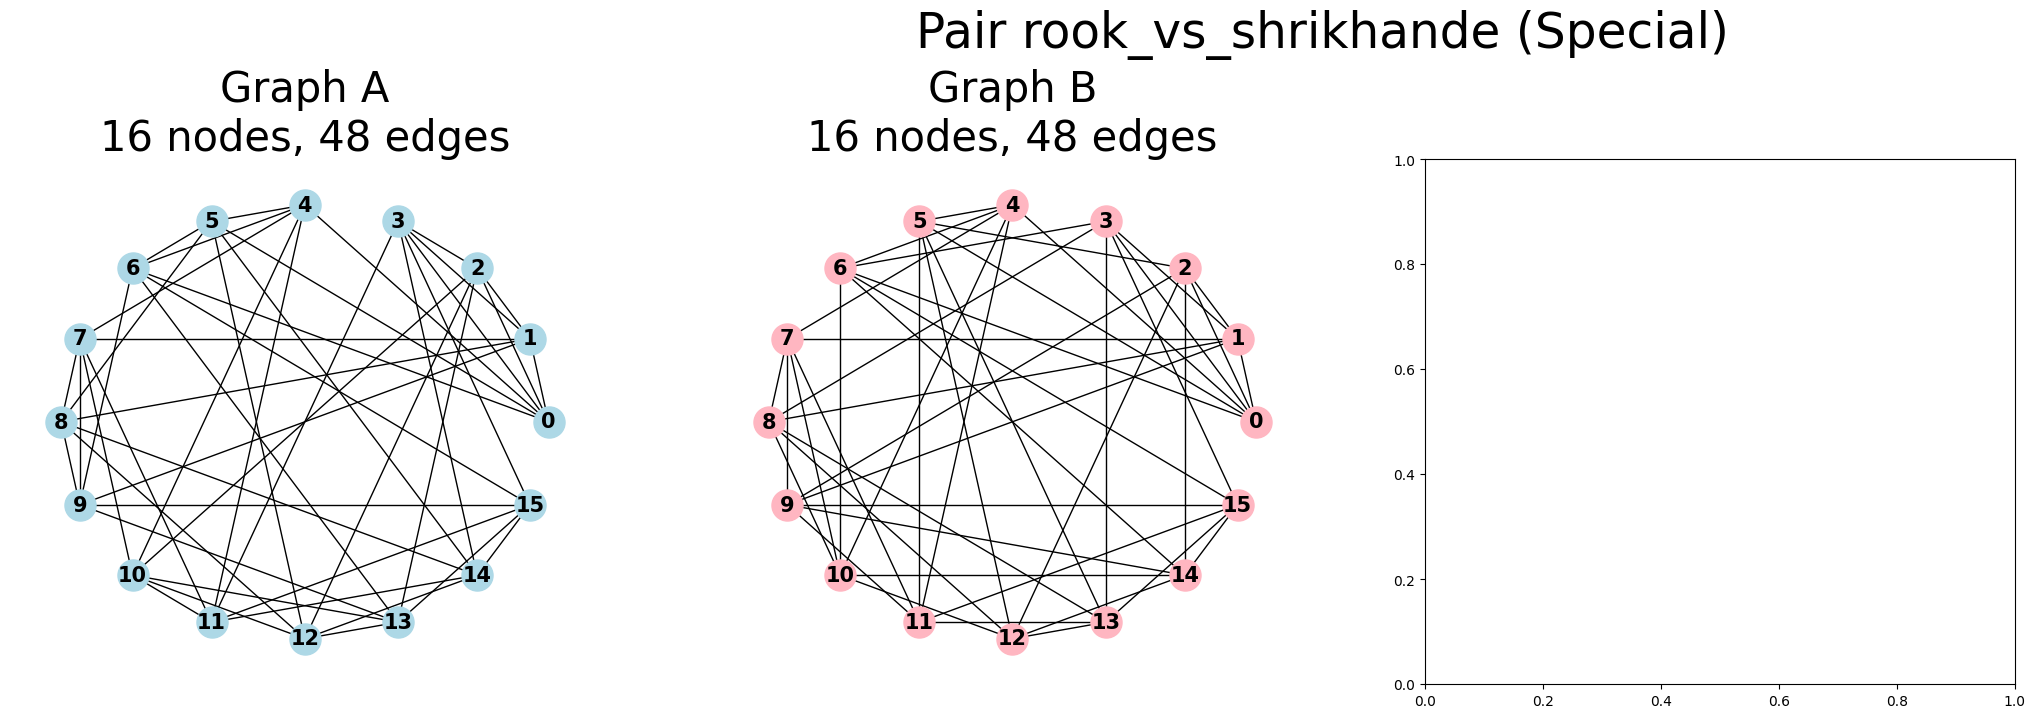

In [31]:

# Load the graphs
rook = nx.read_graph6("../data/Rook_Shrikhande/rook_graph.g6")
shrikhande = nx.read_graph6("../data/Rook_Shrikhande/shrikhande.g6")

rook_data = nx_to_pyg(rook)
shrikhande_data = nx_to_pyg(shrikhande)

# Analyze as a special pair
print("Analyzing Rook vs Shrikhande")

# After loading rook and shrikhande graphs
print("Computing ORCs for Rook and Shrikhande graphs...")

print("Using the Southern ORC example")
southern_orc_example(rook, shrikhande)
print("Done with Southern ORC example")

# Load the Rook and Shrikhande graphs
G1, G2 = rook, shrikhande

# Lift to hypergraphs
hg1_lifted = lift_to_hypergraph(G1, verbose=False, already_in_nx=True)
hg2_lifted = lift_to_hypergraph(G2, verbose=False, already_in_nx=True)

# Plot the lifted hypergraphs
plot_hypergraph_pair(
    G1, G2, hg1_lifted, hg2_lifted, 
    "rook_vs_shrikhande", "Special", False, 
    "plots/hypergraph_pairs"
)